# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
class ParticleSwarmOptimization:
    def __init__(self, max_iter, num_particles, x_upper, x_lower):
        self.max_iter = max_iter
        self.num_particles = num_particles
        self.c1 = 1
        self.c2 = 1
        self.w = 1
        self.x_upper = x_upper
        self.x_lower = x_lower
        self.global_best_obj = 0
        self.global_best_list = list()

    def compute_objective_function_value(self, x):
        value = - x ** 5 + 5 * (x ** 3) + 20 * x - 5
        return value

    def initialize(self):
        x = [-2, 0, 1, 3]
        v = [0 for i in range(self.num_particles)]
        return x, v

    def generate_two_rv(self):
        r1 = np.random.rand()
        r2 = np.random.rand()
        return r1, r2

    def compute_velocity(self, pos, v, local_best_pos):
        r1, r2 = self.generate_two_rv()
        v = self.w * v + self.c1 * r1 * (local_best_pos - pos) + self.c2 * r2 * (self.global_best_pos - pos)
        return v

    def return_max(self, x, x_next):
        return max(x, x_next)

    def update_local_best(self, x_next_pos, x_next_obj, x_pos, x_obj):
        local_best_pos = []
        local_best_obj = []
        global_best_pos = None
        for idx in range(self.num_particles):
            if (x_next_obj[idx] >= x_obj[idx]):
                local_best_pos.append(x_next_pos[idx])
                local_best_obj.append(x_next_obj[idx])
            else:
                local_best_pos.append(x_pos[idx])
                local_best_obj.append(x_obj[idx])
        return local_best_pos, local_best_obj

    def update_global_best(self, local_best_pos, local_best_obj):
        max_local_obj = max(local_best_obj)
        max_local_idx = local_best_obj.index(max_local_obj)
        if max_local_obj >= self.global_best_obj:
            self.global_best_pos = local_best_pos[max_local_idx]
            self.global_best_obj = local_best_obj[max_local_idx]
    
    def bound_value(self, x):
        x = max(self.x_lower, x)
        x = min(self.x_upper, x)
        return x

    def solve(self):
        #initialization
        pos, v = self.initialize()
        obj = list(map(self.compute_objective_function_value, pos))
        local_best_pos = pos
        local_best_obj = obj
        
        self.global_best_obj = max(local_best_obj)
        idx_best_pos = local_best_obj.index(self.global_best_obj)
        self.global_best_pos = local_best_pos[idx_best_pos]
        
        num_iter = 0
        while num_iter < self.max_iter and pos.count(pos[0]) != len(pos):
            obj = list(map(self.compute_objective_function_value, pos))

            #compute velocity
            v = list(map(self.compute_velocity, pos, v, local_best_pos))

            #update position
            next_pos = list(map(lambda x, y: x + y, pos, v))
            next_obj = list(map(self.compute_objective_function_value, next_pos))

            #update local and global optimum
            local_best_pos, local_best_obj = self.update_local_best(next_pos, next_obj, pos, obj)
            self.update_global_best(local_best_pos, local_best_obj)
      
            #update position, check whether position are bounded 
            pos = list(map(self.bound_value, next_pos))
            num_iter += 1
            
            self.global_best_list.append(self.global_best_obj)
            print(f"Iteration {num_iter}, global best solution is {round(self.global_best_pos, 4)}, objective value = {round(self.global_best_obj, 4)}")

In [3]:
class SimulatedAnnealing:
    def __init__(self):
        self.best_obj_val = list()

    def solve(self, init_x, init_temp, mutation_range, max_iter):
        num_iter = 1
        temp_stop = 1 #Temperature lower bound
        #initialization
        cur_temp = self.get_temp(num_iter, init_temp)
        cur_x = init_x
        best_x = cur_x
        cur_val = self.compute_objective_value(cur_x)
        best_val = cur_val
        #start solving
        while num_iter <= max_iter and cur_temp > temp_stop:
            print(f"Iteration {num_iter}, global best solution is {round(best_x, 4)}, objective value = {round(best_val, 4)}")
            mutation_x, mutation_val = self.get_mutation_objective_value(cur_x, mutation_range)
            #print(mutation_x, mutation_val)
            diff = mutation_val - cur_val
            update_prob = self.get_boltzmann_prob(diff, cur_val)
            update_threshold = self.get_uniform_dist()
            if update_prob > update_threshold:
                #record best value
                if mutation_val > best_val:
                    best_val = mutation_val
                    best_x = mutation_x

                #update
                cur_x = mutation_x
                cur_val = mutation_val

            self.best_obj_val.append(best_val)
            num_iter+=1

    def get_temp(self, num_iter, initial_temp):
        eplison = 0.05
        temp = ((1 - eplison) ** num_iter) * initial_temp
        return temp

    def get_boltzmann_prob(self, delta_f, temperature):
        prob = min(1, np.exp(- delta_f / temperature))
        return prob

    def get_uniform_dist(self):
        """Get probability from a uniform distribution (0, 1)
        """
        return np.random.rand()

    def get_mutation_objective_value(self, x, mutation_range):
        u = self.get_uniform_dist()
        r = (x - mutation_range) + u * (mutation_range * 2)
        #bound value
        r = min(4, r)
        r = max(-4, r)
        mutation_obj_val = self.compute_objective_value(r)
        return r, mutation_obj_val

    def compute_objective_value(self, x):
        value = - x ** 5 + 5 * (x ** 3) + 20 * x - 5
        return value

In [4]:
max_iter = 20
num_particles = 4
x_upper = 4
x_lower = -4

In [5]:
np.random.seed(5080)
PSO = ParticleSwarmOptimization(max_iter, num_particles, x_upper, x_lower)
PSO.solve()
PSO_obj = PSO.global_best_list

Iteration 1, global best solution is 1.4954, objective value = 34.1513
Iteration 2, global best solution is 1.4954, objective value = 34.1513
Iteration 3, global best solution is 1.629, objective value = 37.7227
Iteration 4, global best solution is 2.0559, objective value = 42.8374
Iteration 5, global best solution is 2.0559, objective value = 42.8374
Iteration 6, global best solution is 2.0559, objective value = 42.8374
Iteration 7, global best solution is 2.0559, objective value = 42.8374
Iteration 8, global best solution is 2.0559, objective value = 42.8374
Iteration 9, global best solution is 2.0559, objective value = 42.8374
Iteration 10, global best solution is 2.0559, objective value = 42.8374
Iteration 11, global best solution is 2.0559, objective value = 42.8374
Iteration 12, global best solution is 2.0559, objective value = 42.8374
Iteration 13, global best solution is 2.0559, objective value = 42.8374
Iteration 14, global best solution is 2.0559, objective value = 42.8374
It

# Problem2

In [6]:
class KnapSackProblem:
    def __init__(self, max_weight, weight, sp, items):
        self.max_weight = max_weight
        self.weight = weight
        self.sp = sp
        self.bag_length = len(sp)
        self.bag = np.zeros_like([i for i in range(bag_length)])
        self.items = items
        self.cross_over_probability = 0.1
        self.global_best_sp_list = list()

    def pass_verification(self, candidate: np.array):
        passed = False
        candidate_weight = self.compute_weight(candidate)
        cond1 = (candidate_weight <= self.max_weight)
        cond2 = (sum(candidate[:3]) >= 1) and (sum(candidate[3:6]) >= 1) and (sum(candidate[6:9]) >= 1)
        if cond1 and cond2:
            passed = True
        return passed

    def compute_weight(self, candidate: np.array):
        return np.dot(candidate, self.weight)

    def compute_sp(self, candidate: np.array):
        sp = np.dot(candidate, self.sp)
        cond1 = (candidate[0] == 1) and (candidate[5] == 1) #extra 5 points
        cond2 = candidate[3] == 1 and (candidate[11] == 1 or candidate[12] == 1) #extra 15 points
        cond3 = (candidate[10] == 1 or candidate[13] == 1) and (candidate[5] == 1 and candidate[8] == 1) #extra 25 points
        cond4 = sum(candidate[6:9]) == 3 #extra 70 points
        if cond1:
            sp+=5
        if cond2:
            sp+=15
        if cond3:
            sp+=25
        if cond4:
            sp+=70
        return sp

    def exhaustive_search(self):
        candidate_list = list(itertools.product([0, 1], repeat=self.bag_length))
        best_sp = 0
        best_candidate = None
        possible_solutions = 0
        for candidate in candidate_list:
            if self.pass_verification(candidate):
                possible_solutions+=1
                candidate_sp = self.compute_sp(candidate)
                #print(candidate, candidate_sp)
                if candidate_sp > best_sp:
                    best_sp = candidate_sp
                    best_candidate = candidate

        best_candidate = np.array(best_candidate).astype(bool)
        best_items = np.array(self.items)[best_candidate]
        print(f"Number of all possible solutions = {possible_solutions}")
        print(f"Best survival points is {best_sp}")
        #print(best_candidate)
        print(f"The best items are {best_items}")

    def solve_with_GA(self, pop_size, max_iter):
        num_iter = 0
        
        global_best_sp = 0
        global_best_candidate = None
        #roulette-wheel selection
        #uniform crossover, prob = 0.1
        #multi bit flip mutation, consecutive based on item types
        population = self.initialize_pop(pop_size)
        population_sp = list(map(self.compute_sp, population))
        best_sp = max(population_sp)
        global_best_sp = best_sp
        global_best_candidate = population[population_sp.index(global_best_sp)]
        
        while num_iter < max_iter:
            print(f"Iteration {num_iter + 1}, current generation best survival point = {best_sp}, global best survival points is {global_best_sp}")
            parents_a, parents_b = self.roulette_wheel_selection(population)
            offsprings = self.cross_over(parents_a, parents_b)
            population = self.mutation(offsprings)

            #update best candidate
            population_sp = list(map(self.compute_sp, population))
            best_sp = max(population_sp)
            if best_sp > global_best_sp:
                global_best_candidate = population[population_sp.index(best_sp)]  
                global_best_sp = best_sp          
                best_items = np.array(self.items)[global_best_candidate]
            
            self.global_best_sp_list.append(global_best_sp)
            num_iter +=1
            

    def initialize_pop(self, pop_size):
        candidate_list = list(itertools.product([0, 1], repeat=self.bag_length))
        len_cand_list = len(candidate_list)
        candidates = []

        #initialize population
        while True:
            idx = np.random.randint(0, len_cand_list)
            candidate = np.array(candidate_list[idx], dtype = bool)
            if self.pass_verification(candidate):
                break
        candidates = [candidate for i in range(pop_size)]
        #print(candidates)
        return candidates

    def roulette_wheel_selection(self, population):
        # Computes the totallity of the population fitness
        population_fitness = sum([self.compute_sp(x) for x in population])
        parents_a = []
        parents_b = []
        # Computes for each chromosome the probability 
        chromosome_probabilities = [self.compute_sp(x)/population_fitness for x in population]

        for i in range(len(population)):
            idx_a = np.random.choice(list(range(len(population))), p = chromosome_probabilities)
            idx_b = np.random.choice(list(range(len(population))), p = chromosome_probabilities)
            parents_a.append(population[idx_a])
            parents_b.append(population[idx_b])

        return parents_a, parents_b

    def cross_over(self, parents_a, parents_b):
        offsprings = []
        idx_parent = 0

        while len(offsprings) < len(parents_a):
            offspring = parents_a[idx_parent]
            #print(offspring)
            cross_over_prob = np.random.rand(len(offspring))
            bool_cross_over = self.cross_over_probability > cross_over_prob
            #print(bool_cross_over)
            #print("="*10)
            #cross over each bit
            #print(len(offspring))
            for idx_bit in range(len(offspring)):
                if bool_cross_over[idx_bit] == True:
                    offspring[idx_bit] = parents_b[idx_parent][idx_bit]

            #check whether subject to constraint
            if self.pass_verification(offspring):
                offsprings.append(offspring)
                idx_parent+=1
            #print(bool_cross_over)
        return offsprings

    def mutation(self, offsprings):
        new_population = []
        idx_offspring = 0
        while len(new_population) < len(offsprings):
            offspring = offsprings[idx_offspring]
            #choose one item type to mutate
            rand_int = np.random.randint(0, 4)
            #flip knife
            if rand_int == 0:
                flip_idx = np.random.randint(0, 3, 2)
            #flip pistol
            elif rand_int == 1:
                flip_idx = np.random.randint(3, 6, 2)
            #flip equipment
            elif rand_int == 2:
                flip_idx = np.random.randint(6, 9, 2)
            #flip primary
            elif rand_int == 3:
                flip_idx = np.random.randint(9, 15, 2)
            
            start_point = min(flip_idx)
            end_point = max(flip_idx)
            offspring[start_point:end_point] = np.invert(offspring[start_point:end_point])
            if self.pass_verification(offspring):
                new_population.append(offspring)
                idx_offspring+=1
        return new_population

    def initialize(self):
        candidate_list = list(itertools.product([0, 1], repeat=self.bag_length))
        len_cand_list = len(candidate_list)

        #initialize population
        while True:
            idx = np.random.randint(0, len_cand_list)
            candidate = np.array(candidate_list[idx], dtype = bool)
            if self.pass_verification(candidate):
                break
        return candidate

    def find_best_neighbors(self, candidate):
        neighbors = []
        for i in range(len(candidate)):
            candidate_ = candidate.copy()
            candidate_[i] = np.invert(candidate_[i])
            if self.pass_verification(candidate_):
                neighbors.append(candidate_)
        neighbors_sp = list(map(self.compute_sp, neighbors))
        best_neighbor_sp = max(neighbors_sp)
        best_neighbor = neighbors[neighbors_sp.index(best_neighbor_sp)]
        return best_neighbor, best_neighbor_sp

    def solve_with_hill_climbing(self, max_iter):
        cur_point = self.initialize()
        num_iter = 0
        global_best_sp = self.compute_sp(cur_point)
        global_best_candidate = None
        
        while num_iter < max_iter:
            print(f"Iteration {num_iter}: best surivival point = {global_best_sp}")
            best_neighbor, best_neighbor_sp = self.find_best_neighbors(cur_point)
            if best_neighbor_sp > global_best_sp:
                global_best_sp = self.compute_sp(best_neighbor)
                global_best_candidate = best_neighbor
                cur_point = best_neighbor
            self.global_best_sp_list.append(global_best_sp)
            num_iter+=1
            
        
        best_items = np.array(self.items)[global_best_candidate]
        print(f"Best solution is {best_items}")

    def solve_with_random_walk(self, max_iter):
        cur_point = self.initialize()
        num_iter = 0
        global_best_sp = self.compute_sp(cur_point)
        global_best_candidate = None
        
        while num_iter < max_iter:
            print(f"Iteration {num_iter}: best surivival point = {global_best_sp}")
            best_neighbor, best_neighbor_sp = self.find_best_neighbors(cur_point)
            if best_neighbor_sp > global_best_sp:
                global_best_sp = self.compute_sp(best_neighbor)
                global_best_candidate = best_neighbor
            cur_point = best_neighbor
            self.global_best_sp_list.append(global_best_sp)
            num_iter+=1
        
        best_items = np.array(self.items)[global_best_candidate]
        print(f"Best solution is {best_items}")

    def solve_with_simulated_annealing(self, init_temp, max_iter):
        num_iter = 1
        temp_stop = 1 #Temperature lower bound
        #initialization
        cur_temp = self.get_temp(num_iter, init_temp)
        cur_point = self.initialize()
        cur_sp = self.compute_sp(cur_point)
        global_best_candidate = cur_point
        global_best_sp = self.compute_sp(cur_point)     
        #start solving
        while num_iter <= max_iter and cur_temp > temp_stop:
            print(f"Iteration {num_iter}: best surivival point = {global_best_sp}")
            best_neighbor, best_neighbor_sp = self.find_best_neighbors(cur_point)
            diff = best_neighbor_sp - cur_sp
            update_prob = self.get_boltzmann_prob(diff, cur_sp)
            update_threshold = self.get_uniform_dist()
            if update_prob > update_threshold:
                #record best value
                if best_neighbor_sp > global_best_sp:
                    global_best_sp = best_neighbor_sp
                    global_best_candidate = best_neighbor

                #update
                cur_point = best_neighbor
                cur_sp = best_neighbor_sp
            self.global_best_sp_list.append(global_best_sp)
            num_iter+=1

        best_items = np.array(self.items)[global_best_candidate]
        print(f"Best solution is {best_items}")

    def get_temp(self, num_iter, initial_temp):
        eplison = 0.05
        temp = ((1 - eplison) ** num_iter) * initial_temp
        return temp

    def get_boltzmann_prob(self, delta_f, temperature):
        prob = min(1, np.exp(- delta_f / temperature))
        return prob

    def get_uniform_dist(self):
        """Get probability from a uniform distribution (0, 1)
        """
        return np.random.rand()

In [7]:
#order: knife - pistols - equipment - primary
bag_length = 15
items = ["Shadow Daggers", "Huntsman Knife", "Gut Knife", "228 Compacy Handgun", "Night Hawk", "Desert Eagle Magnum", "Gas Mask", "Night-Vision Goggle", "Tactical Shield",
    "Ingram MAC-10 SMG", "Leone YG1265 Auto Shotgun", "M4A1 Carbine", "AK-47 Rifle", "Krieg 550 Sniper Rifles", "M249 Machine Gun"]
weight = [3.3, 3.4, 6.0, 26.1, 37.6, 62.5, 24.2, 32.1, 42.5, 100.2, 141.1, 119.2, 122.4, 247.6, 352.0]
sp = [7, 8, 13, 29, 48, 99, 9, 12, 15, 177, 213, 202, 210, 380, 485]
max_weight = 529
bag = np.zeros_like([i for i in range(bag_length)])

In [8]:
KSP = KnapSackProblem(max_weight, weight, sp, items)
KSP.exhaustive_search()

Number of all possible solutions = 6455
Best survival points is 842
The best items are ['Shadow Daggers' 'Desert Eagle Magnum' 'Gas Mask' 'Night-Vision Goggle'
 'Tactical Shield' 'Ingram MAC-10 SMG' 'Leone YG1265 Auto Shotgun'
 'AK-47 Rifle']


In [9]:
np.random.seed(11)
pop_size = 10
max_iter = 20
KSP = KnapSackProblem(max_weight, weight, sp, items)
KSP.solve_with_GA(pop_size, max_iter)
best_sp_GA = KSP.global_best_sp_list
best_sp_GA = np.repeat(best_sp_GA, pop_size)

Iteration 1, current generation best survival point = 296, global best survival points is 296
Iteration 2, current generation best survival point = 505, global best survival points is 505
Iteration 3, current generation best survival point = 294, global best survival points is 505
Iteration 4, current generation best survival point = 526, global best survival points is 526
Iteration 5, current generation best survival point = 598, global best survival points is 598
Iteration 6, current generation best survival point = 474, global best survival points is 598
Iteration 7, current generation best survival point = 666, global best survival points is 666
Iteration 8, current generation best survival point = 800, global best survival points is 800
Iteration 9, current generation best survival point = 622, global best survival points is 800
Iteration 10, current generation best survival point = 681, global best survival points is 800
Iteration 11, current generation best survival point = 542,

In [10]:
np.random.seed(157)
max_iter = 200
KSP = KnapSackProblem(max_weight, weight, sp, items)
KSP.solve_with_hill_climbing(max_iter)
best_sp_HC = KSP.global_best_sp_list

Iteration 0: best surivival point = 463
Iteration 1: best surivival point = 676
Iteration 2: best surivival point = 705
Iteration 3: best surivival point = 714
Iteration 4: best surivival point = 714
Iteration 5: best surivival point = 714
Iteration 6: best surivival point = 714
Iteration 7: best surivival point = 714
Iteration 8: best surivival point = 714
Iteration 9: best surivival point = 714
Iteration 10: best surivival point = 714
Iteration 11: best surivival point = 714
Iteration 12: best surivival point = 714
Iteration 13: best surivival point = 714
Iteration 14: best surivival point = 714
Iteration 15: best surivival point = 714
Iteration 16: best surivival point = 714
Iteration 17: best surivival point = 714
Iteration 18: best surivival point = 714
Iteration 19: best surivival point = 714
Iteration 20: best surivival point = 714
Iteration 21: best surivival point = 714
Iteration 22: best surivival point = 714
Iteration 23: best surivival point = 714
Iteration 24: best suriviv

In [11]:
np.random.seed(158)
max_iter = 200
KSP = KnapSackProblem(max_weight, weight, sp, items)
KSP.solve_with_random_walk(max_iter)
best_sp_RW = KSP.global_best_sp_list

Iteration 0: best surivival point = 286
Iteration 1: best surivival point = 666
Iteration 2: best surivival point = 790
Iteration 3: best surivival point = 802
Iteration 4: best surivival point = 802
Iteration 5: best surivival point = 802
Iteration 6: best surivival point = 802
Iteration 7: best surivival point = 802
Iteration 8: best surivival point = 802
Iteration 9: best surivival point = 802
Iteration 10: best surivival point = 802
Iteration 11: best surivival point = 802
Iteration 12: best surivival point = 802
Iteration 13: best surivival point = 802
Iteration 14: best surivival point = 802
Iteration 15: best surivival point = 802
Iteration 16: best surivival point = 802
Iteration 17: best surivival point = 802
Iteration 18: best surivival point = 802
Iteration 19: best surivival point = 802
Iteration 20: best surivival point = 802
Iteration 21: best surivival point = 802
Iteration 22: best surivival point = 802
Iteration 23: best surivival point = 802
Iteration 24: best suriviv

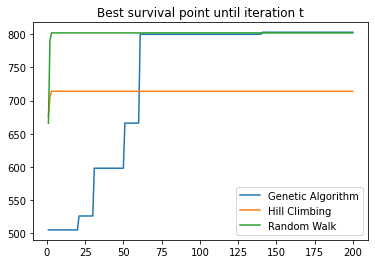

In [12]:
x = [idx+1 for idx in range(200)]
plt.plot(x, best_sp_GA)
plt.plot(x, best_sp_HC)
plt.plot(x, best_sp_RW)
plt.legend(["Genetic Algorithm", "Hill Climbing", "Random Walk"])
plt.title("Best survival point until iteration t")
plt.show()

# Problem 3 - 1

In [13]:
init_x = 0
init_temp = 100
mutation_range = 3
max_iter = 20
np.random.seed(5)
SA = SimulatedAnnealing()
SA.solve(init_x, init_temp, mutation_range, max_iter)
SA_obj = SA.best_obj_val

Iteration 1, global best solution is 0, objective value = -5
Iteration 2, global best solution is 0, objective value = -5
Iteration 3, global best solution is 0, objective value = -5
Iteration 4, global best solution is 0, objective value = -5
Iteration 5, global best solution is 1.5259, objective value = 35.0103
Iteration 6, global best solution is 1.5259, objective value = 35.0103
Iteration 7, global best solution is 1.5259, objective value = 35.0103
Iteration 8, global best solution is 1.5259, objective value = 35.0103
Iteration 9, global best solution is 1.5259, objective value = 35.0103
Iteration 10, global best solution is 1.5259, objective value = 35.0103
Iteration 11, global best solution is 1.5259, objective value = 35.0103
Iteration 12, global best solution is 1.5259, objective value = 35.0103
Iteration 13, global best solution is 1.5259, objective value = 35.0103
Iteration 14, global best solution is 1.5259, objective value = 35.0103
Iteration 15, global best solution is -3.

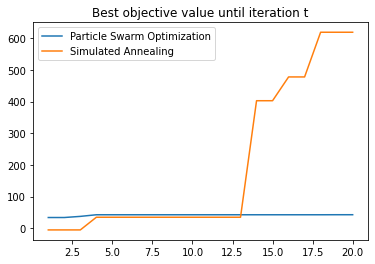

In [14]:
x = [idx+1 for idx in range(20)]
plt.plot(x, PSO_obj)
plt.plot(x, SA_obj)
plt.legend(["Particle Swarm Optimization", "Simulated Annealing"])
plt.title("Best objective value until iteration t")
plt.show()

# Problem 3 - 2

In [15]:
init_temp = 100
np.random.seed(1108)
max_iter = 200
KSP = KnapSackProblem(max_weight, weight, sp, items)
KSP.solve_with_simulated_annealing(init_temp, max_iter)
best_sp_SA = KSP.global_best_sp_list

Iteration 1: best surivival point = 333
Iteration 2: best surivival point = 333
Iteration 3: best surivival point = 333
Iteration 4: best surivival point = 333
Iteration 5: best surivival point = 333
Iteration 6: best surivival point = 333
Iteration 7: best surivival point = 333
Iteration 8: best surivival point = 333
Iteration 9: best surivival point = 333
Iteration 10: best surivival point = 333
Iteration 11: best surivival point = 333
Iteration 12: best surivival point = 333
Iteration 13: best surivival point = 738
Iteration 14: best surivival point = 782
Iteration 15: best surivival point = 794
Iteration 16: best surivival point = 794
Iteration 17: best surivival point = 794
Iteration 18: best surivival point = 794
Iteration 19: best surivival point = 794
Iteration 20: best surivival point = 794
Iteration 21: best surivival point = 794
Iteration 22: best surivival point = 794
Iteration 23: best surivival point = 794
Iteration 24: best surivival point = 794
Iteration 25: best surivi

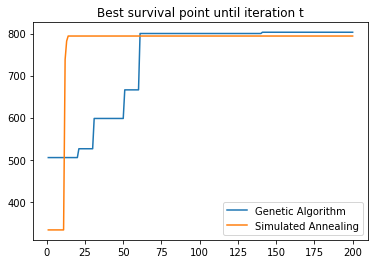

In [16]:
x = [idx+1 for idx in range(200)]
plt.plot(x, best_sp_GA)
plt.plot(x, best_sp_SA)
plt.legend(["Genetic Algorithm", "Simulated Annealing"])
plt.title("Best survival point until iteration t")
plt.show()